### Обзор данных

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

pd.options.display.float_format = '{:.2f}'.format 
#форматирование в таблице, 2 знака после запятой


In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

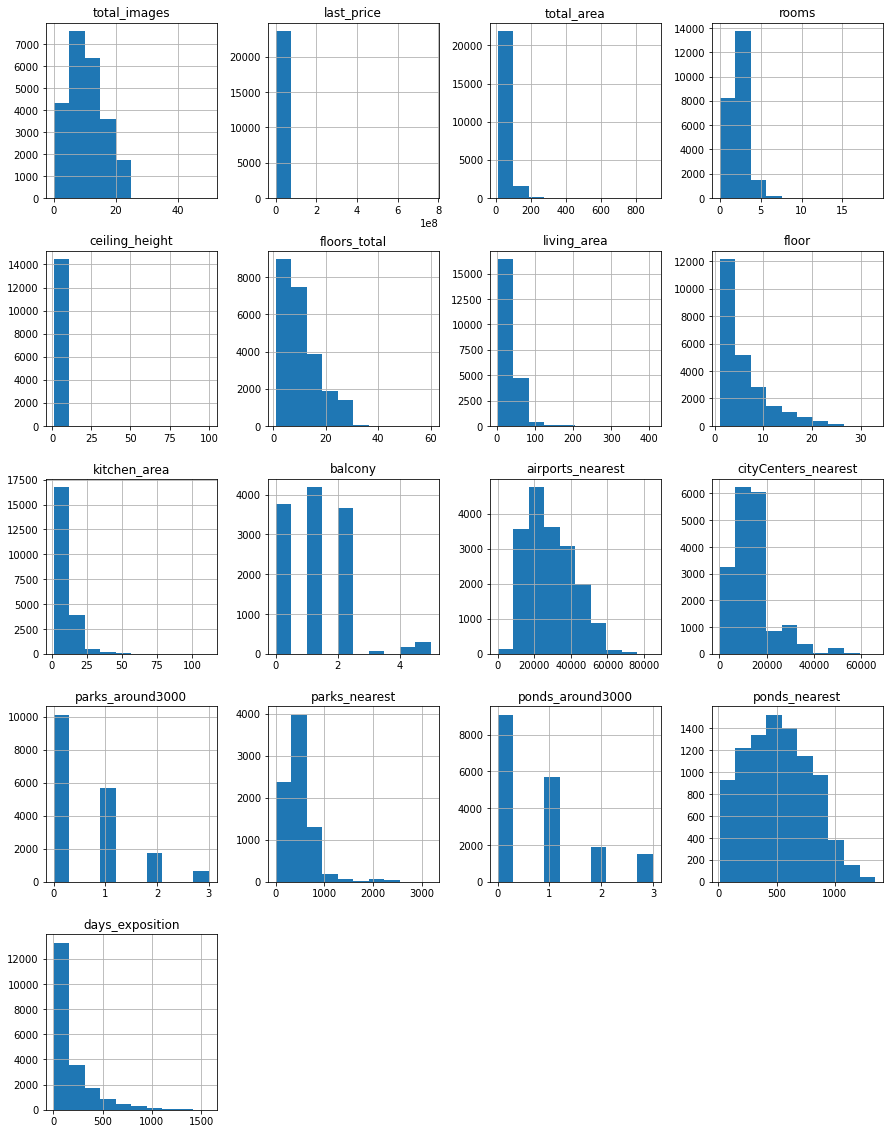

In [5]:
data.hist(figsize=(15, 20))
plt.show();



### Предобработка данных

In [62]:
pd.DataFrame(round(data.isna().mean()*100,)
            ).style.background_gradient('coolwarm')
#проверка на дубликаты

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,0.000000


In [7]:

data = data.dropna(subset=['floors_total'])
data = data.dropna(subset=['locality_name'])

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

data['is_apartment'] = data['is_apartment'].fillna('False')
data['balcony'] = data['balcony'].fillna('0')
data['airports_nearest'] = data['airports_nearest'].fillna('0')
data['parks_around3000'] = data['parks_around3000'].fillna('0')
data['parks_nearest'] = data['parks_nearest'].fillna('0')
data['ponds_around3000'] = data['ponds_around3000'].fillna('0')
data['ponds_nearest'] = data['ponds_nearest'].fillna('0')


for i in data['rooms'].unique(): 
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == i), 'living_area'].median()
    

Пропущены значения в столбцах: 

ceiling_height - заполняем медианным значением   
floors_total - невозможно заполнить точными данными, пропусков мало, меньше 1%, можно удалить  
living_area - заполняем медианным значением по количеству комнат   
is_apartment - скорее всего пропуски означают, что это не опартоменты, заменяем на False   
kitchen_area - может означать отсутствие кухни, оставляем   
balcony - пропуск означает отсутсвие, меняем на 0   
locality_name - нет информации о локации, всего 49 пропусков, меньше 1%, можно удалить   
airports_nearest - пропуск означает, отсутствие поблизости, меняем на 0 (так как данные автоматические)   
cityCenters_nearest  - пропуск может означать, что дом загородом, можно оставить, нет данных для заполнения, но вдальнейшем поменяем на 0 для дальнейшей работы с данными   
parks_around3000 - пропуск означает, отсутствие поблизости, меняем на 0 (так как данные автоматические)   
parks_nearest - пропуск означает, отсутствие поблизости, меняем на 0 (так как данные автоматические)   
ponds_around3000 - пропуск означает, отсутствие поблизости, меняем на 0 (так как данные автоматические)   
ponds_nearest - пропуск означает, отсутствие поблизости, меняем на 0 (так как данные автоматические)   
days_exposition - нет данных о количестве дней, возможно объявление еще не закрыто, оставляем

В первой половине таблицы пропуски можно объяснить тем, что люди просто не записали данные о квартирах. Особенно заметно по высоте потолков (мало кто её знает). Вторая половина пропусков, связана с отсутствием данных, поскольку их заполнял компьютер.


In [8]:
data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['airports_nearest'] = data['airports_nearest'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['parks_nearest'] = data['parks_nearest'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['ponds_nearest'] = data['ponds_nearest'].astype(int)

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y/%m/%dT%H:%M:%S")

# Преобразовал столбцы в тип данных int для удобства. В любом случае после запятой были нули. (кроме стобцов с пропусками)
# Так же привел столбец с датой в читаемый вид.

In [9]:
data = data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000' : 'parks_around',
                             'ponds_around3000' : 'ponds_around' })
#изменил на более корректные названия столбцов

In [10]:
#data.duplicated().sum() явных дубликуатов нет, устраняем неявные
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].replace(['село ', 'городской поселок ', 'котеджный ',
                                                       'садовое товарищество ', 'деревня ', 'поселок ',
                                                       'станции ', 'городского типа ','коттеджный '],'', regex=True)
list(data['locality_name'].sort_values(ascending=False).unique())


['садоводческое некоммерческое товарищество Лесная Поляна',
 'при железнодорожной Приветнинское',
 'при железнодорожной Вещево',
 'имени Свердлова',
 'имени Морозова',
 'Янино-1',
 'Ям-Тесово',
 'Яльгелево',
 'Ялгино',
 'Юкки',
 'Щеглово',
 'Шушары',
 'Шум',
 'Шугозеро',
 'Шпаньково',
 'Шлиссельбург',
 'Чудской Бор',
 'Цвылево',
 'Цвелодубово',
 'Хязельки',
 'Хапо-Ое',
 'Форт Красная Горка',
 'Форносово',
 'Федоровское',
 'Фалилеево',
 'Ушаки',
 'Усть-Луга',
 'Усть-Ижора',
 'Ульяновка',
 'Углово',
 'Трубников Бор',
 'Тосно',
 'Торфяное',
 'Торошковичи',
 'Торосово',
 'Торковичи',
 'Токсово',
 'Тойворово',
 'Тихковицы',
 'Тихвин',
 'Тесово-4',
 'Терпилицы',
 'Терволово',
 'Тельмана',
 'Тарасово',
 'Тайцы',
 'Сясьстрой',
 'Сяськелево',
 'Счастье',
 'Суходолье',
 'Суоранда',
 'Сумино',
 'Суйда',
 'Стрельна',
 'Стеклянный',
 'Старые Бегуницы',
 'Старосиверская',
 'Старополье',
 'Старое Хинколово',
 'Старая Пустошь',
 'Старая Малукса',
 'Старая Ладога',
 'Старая',
 'Сосновый Бор',
 'Сосново

In [11]:
for i in data['ceiling_height']:
    if i >= 9:
        data['ceiling_height'] = data['ceiling_height'].replace({i: i / 10})
#data['ceiling_height'].unique() 
#делим высоту потолка на 10 для тех значений которые больше 9м, поскольку значения аномально большие 

In [12]:
#Удаляем выбросы
columns_to_filter = [
    'last_price',
    'living_area',
    'kitchen_area',
    'total_area',
    'city_centers_nearest',
    'airports_nearest',
    'days_exposition',
    'parks_nearest',
    'ponds_nearest',
    'total_area',
]
#Название столбцов с выбросами

for i in columns_to_filter:
    data = data[(data[i].isna()) | ((data[i] <= data[i].quantile(0.995)) & (data[i] >= data[i].quantile(0.005)))]
#Цикл отсекающий выбросы по межквартильному интервалу, за исключением пропусков 

Преобразовал столбцы в целые числа, где это необходимо, для дальнейшего анализа и расчетов.
Изменены названия столбцов на более корректные, для удобного прочтения таблицы.
На данном этапе устранили дубликаты в названиях локации. Они появились из-за букв е и ё, и разного написания одного и того же населённого пункта.
Были отсеяны значения, неподходящие для хода иследования. Аномалии и выбросы, для более точного анализа.

### Посчитайте и добавьте в таблицу новые столбцы

In [13]:
data['price_one_meter'] = data['last_price'] / data['total_area']
# Добавляем в таблицу цену за м2


data['weekday'] = data['first_day_exposition'].dt.weekday
# Добавляем день недели публикации

data['month'] = data['first_day_exposition'].dt.month

# Добавляем месяц публикации

data['year'] = data['first_day_exposition'].dt.year
# Добавляем столбец с годом публикации

def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['type_floor'] = data.apply(type_floor,axis = 1)
#Добавляем столбец с типом этажа

data['distance_centre'] = data['city_centers_nearest'] / 1000
data['distance_centre'] = data['distance_centre'].fillna('0').astype(int)
#Добавляем столбец с расстоянием до центра, заполнив пропуски на 0

### Проведите исследовательский анализ данных

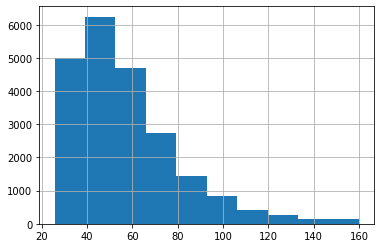

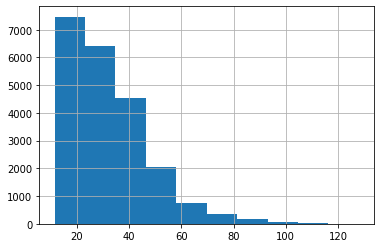

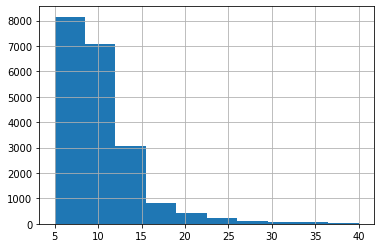

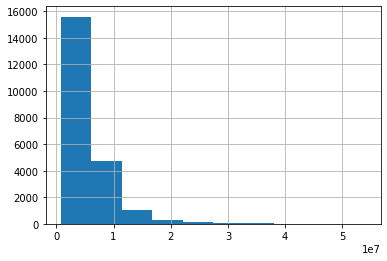

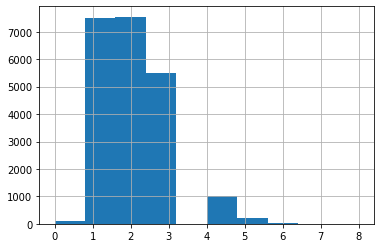

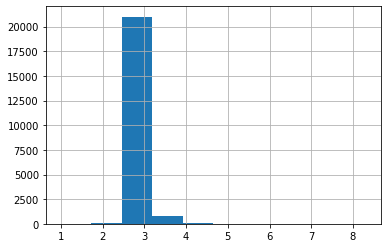

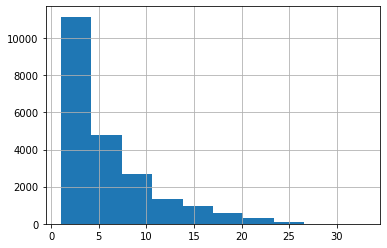

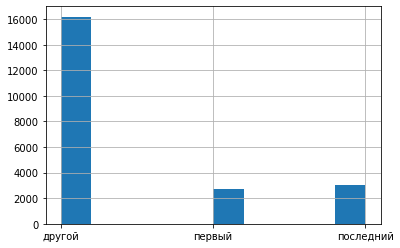

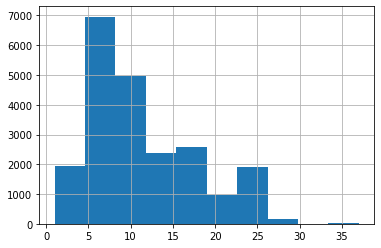

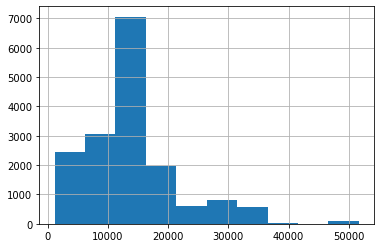

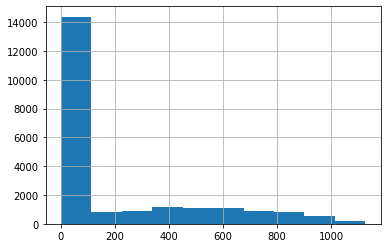

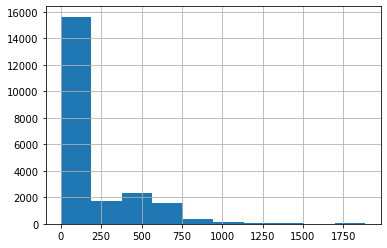

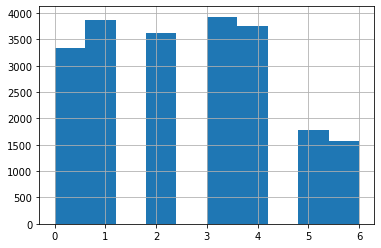

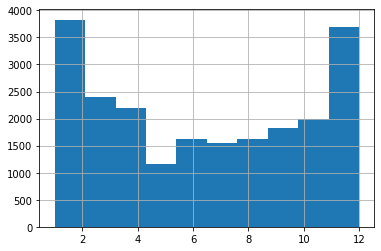

In [61]:
for_analysis = ['total_area', 'living_area', 'kitchen_area',
                'last_price', 'rooms', 'ceiling_height',
               'floor', 'type_floor', 'floors_total', 'city_centers_nearest',
               'ponds_nearest', 'parks_nearest', 'weekday', 'month']
for i in for_analysis:
    data[i].hist()
    plt.show()

Больше всего объявлений с общей площадью от 25 до 65 м2, пик в районе 40-50м2

Основное количество объявлений с жилой площадью от 10 до 45 м2, пик в районе 20м2

Все основные значения находяться с площадью кухни от 5 до 12м2

Большинство однокомнатных и двухкомнатных квартир, чуть меньше трехкомнатных

Высота потолков находится в диапозоне 2,5 - 3,2 метра

В объявлениях преобладают квартиры до 5 этажа

Оснавная масса объявлений с квартирами, которые не находятся на первом или последнем этажах. 

Большинство домов этажностью от 5 до  12 этажей

Большинство домов из объявлений находяться на расстоянии 10 -15 км от центра, при этом домов ближе к центру больше, чем домов дальше 15 км.

Подавляющее число объявлений имеет близкую расположенность к водоемам (100м). Местность богата на водные ресурсы.

Аналогично и с парками, огромное количество объемлений имеют парк в расстоянии не более 200 метров.

Объявлений в выходные дни публикуется меньше, чем в будни.

Чаще объявления публикуют в начале и в конце года.

,days_exposition
mean,172.59
median,93.00


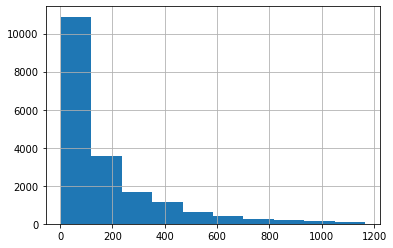

In [29]:
#Изучим сколько дней продавались квартиры
data['days_exposition'].hist()        
data.agg({'days_exposition' : ['mean', 'median']})


In [30]:
data['days_exposition'].describe() 

count   18962.00
mean      172.59
std       201.79
min         3.00
25%        44.00
50%        93.00
75%       223.00
max      1166.00
Name: days_exposition, dtype: float64

Как можно заметить, большинство квартир продается не более чем за 250 дней(75%  за 223 дня). Из этого можно сделать вывод, что
чем меньше времени прошло с момента публикации, тем вероятнее, что квартира будет продана. Особенно это актуально в первые 
180 дней публикации, где самый высокий покачатель продаж.

Быстрыми продажами можно считать, продажи в первые 44 дня, а долгими после 223 дня.

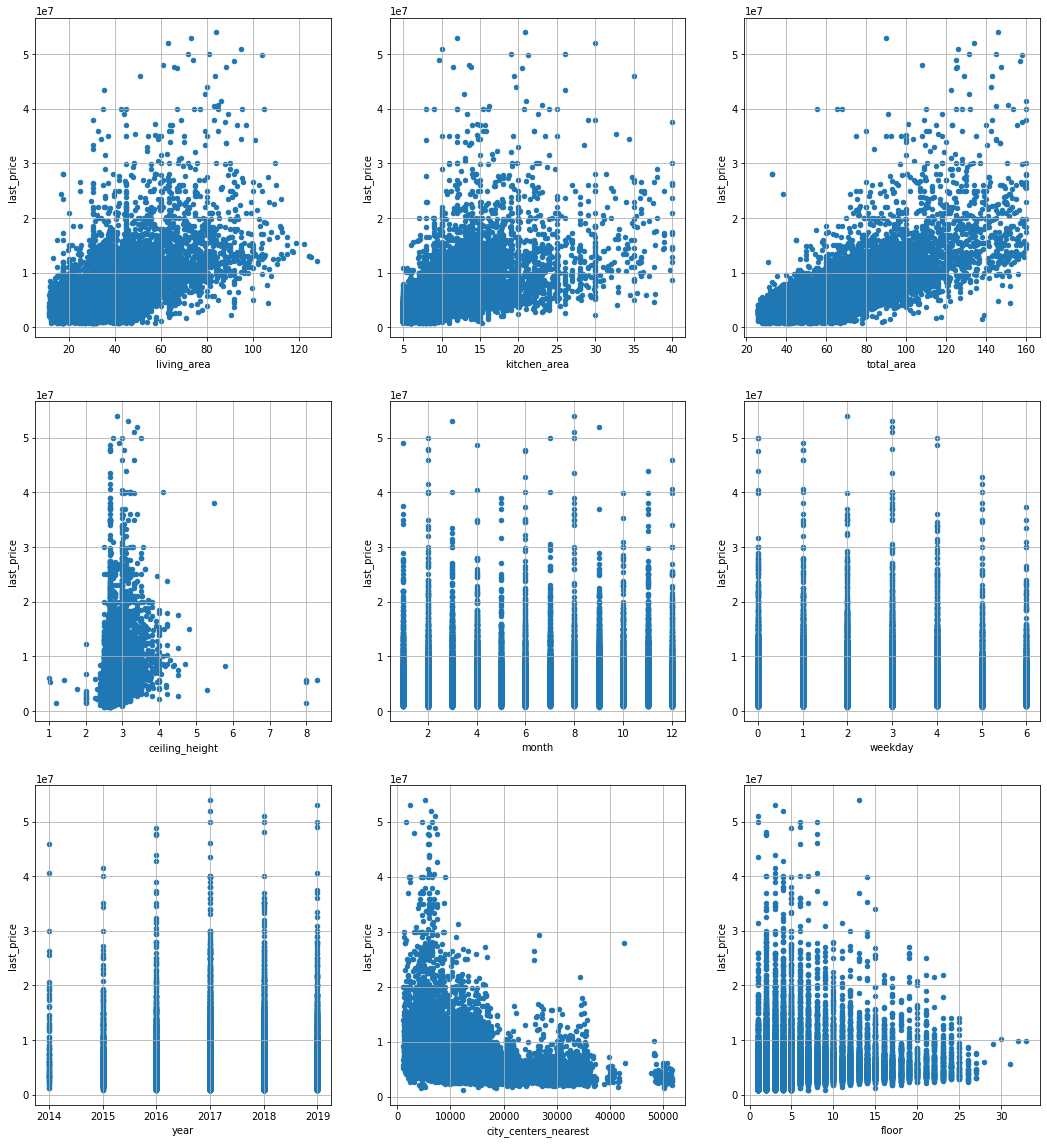

In [31]:
# Факторы, которые больше всего влияют на общую (полную) стоимость объекта.
rows = 3
cols = 3
fig, axes = plt.subplots(3, 3)
axes = axes.ravel()
i = 0
 
for col in ['living_area', 'kitchen_area', 'total_area', 'ceiling_height', 
            'month', 'weekday', 'year', 'city_centers_nearest', 'floor']:
    ax = data.plot(x=col, y='last_price', kind='scatter', ax = axes[i], figsize=(18, 20), grid=True)
    i+=1

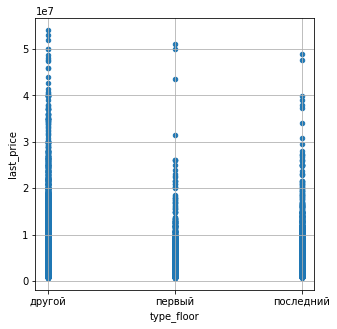

In [47]:
data.plot(x='type_floor', y='last_price', kind='scatter', figsize=(5, 5), grid=True);

In [33]:
for i in ['living_area', 'kitchen_area', 'total_area', 'ceiling_height', 
            'month', 'weekday', 'year', 'city_centers_nearest', 'floor',]:
    print(data[i].corr(data['last_price']))

0.6036187205726259
0.5521523626088911
0.7378188432719595
0.3628902658313056
-0.003738736273127405
-0.01288888852590404
-0.01765203628696666
-0.3449468379140966
0.07328813719523818


Из корреляции можно увидеть, что зависмость присутствует у площадей, высоты потолка и удаленности от центра. Зависимости от высоты этажа небольшая. У остальных факторов зависимость практически отсутствует.


Жилая площадь влияет на цену. Чем больше количество м2 тем заметнее растет цена. Явные отличия начинаются с 50м2. 

Аналогичные выводы можно сделать, как для площади кухни, так и для влощади квартиры в целом.

Наиболее ярко это отражено в площади квартиры, где зависимость площади прослеживается более плавно и структурировано.

Из графика высоты потолков, можно заметить, что небольшая зависимость есть. Высота потолка немного влияет на цену.

Месяц года, не влияет на цену квартиры.

По графику дней недели видно, что в выходные дни цена чуть меньше, но коэффицент кореляции говорит об обратном. Зависимости нет.

С 2014 года цены на квартиры росли, но тенденция роста стагнировала начиная с 2017 года.

Близость к центру также влияет на цену. Чем ближе к центру, тем выше цена. Наиболее дорогие объявления где расстояние до 10км.
По мере удаленности цена падает.

Зависимость цены и высоты этажа практически отсутствует.
Наиболее сильно влияют на цену такие факторы как: Расстояние до центра, этаж и площадь(кухни, жилая или общая).

Первый и последний этаж стоят дешевле других.

In [34]:
#Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

average_price = data.pivot_table(index='locality_name', values='price_one_meter', 
                                 aggfunc=['count', 'mean']).reset_index(level='locality_name')

average_price.columns = ['локация', 'количество', 'среднее']
average_price.sort_values(by='количество', ascending = False).head(10)


,локация,количество,среднее
212,Санкт-Петербург,14554,110959.07
135,Мурино,530,84839.36
97,Кудрово,436,94569.53
277,Шушары,424,77851.70
31,Всеволожск,391,68679.59
191,Пушкин,351,102966.60
83,Колпино,332,75142.24
159,Парголово,309,90886.10
38,Гатчина,302,68846.42
32,Выборг,226,58005.20


Из 10 локаций с самым высоким числом объявлений
Самая высокая средняя цена за м2 в Санкт-Петерберге
Самая низкая средняя цена за м2 в Выборге


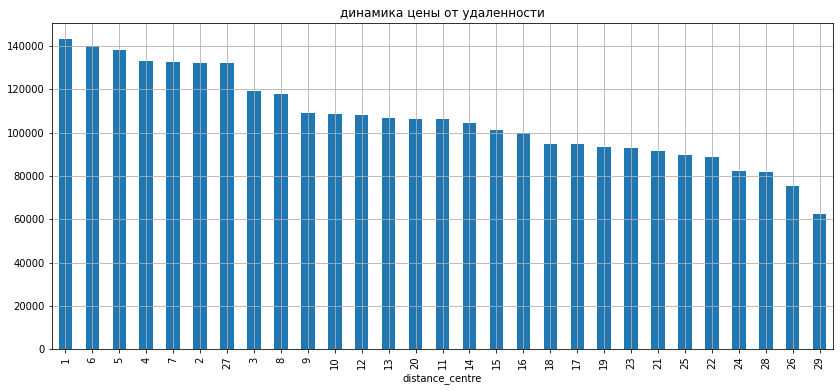

In [35]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург'].query('distance_centre != 0')
group_spb = data_spb.groupby('distance_centre')['price_one_meter'].mean().sort_values(ascending=False)
group_spb.plot(x='distance_centre', y='price_one_meter', figsize=(14,6), kind='bar', grid=True, title = 'динамика цены от удаленности');

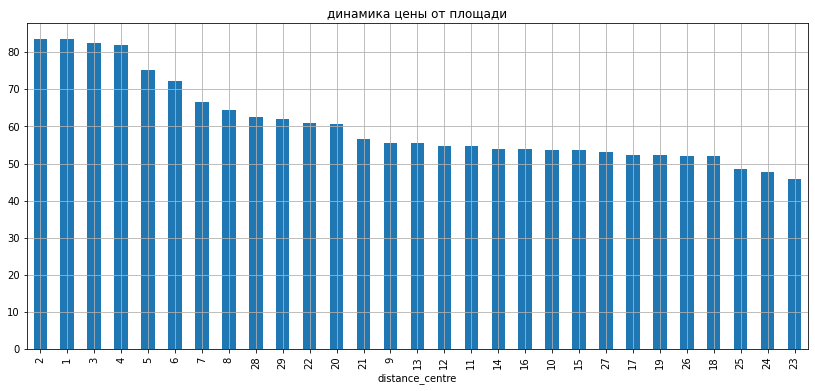

In [36]:
group_spb = data_spb.groupby('distance_centre')['total_area'].mean().sort_values(ascending=False)
group_spb.plot(x='distance_centre', y='total_area', figsize=(14,6), kind='bar', grid=True, title = 'динамика цены от площади');

Из данных графиков  можно заметить, что удаленность от центра Санкт-Петербурга влияет на стоимость квартир. 
Чем дальше от центра, тем ниже цена, но при этом чем дальше от центра, тем меньше площадь квартир.
Отсюда следует, что упала не столько цена, сколько площадь продаваемых квартир.


### Общий вывод

О полученых данных:

1. В данных полученых для иследования, довольно много пропущенных значений, что может быть связано как с человеческим фактором, так и програмной ошибкой. Люди могли просто не записали данные о квартирах. Особенно заметно по высоте потолков. Вторая половина пропусков, связана с отсутствием данных, или сбоем поскольку их заполнял компьютер. Стоит просить людей быть внимательнее в заполнение данных о квартире. И устранить ошибки на основе картографических данных.
2. Были отсеяны значения, неподходящие для хода иследования. Аномалии и выбросы, для более точного анализа, поскольку нам необходимо установить параметры. 

В ходе иследования мною было выявлено:

Факторы, которые сильнее всего влияют на цену: расстояние до центра, высота потолков и площадь(кухни, жилая или общая).
Чем больше м2, тем заметнее растет цена. 
Месяц года не влияет на цену квартиры, как и день недели, но объявлений в выходные дни публикуется меньше. 
С 2014 года цены на квартиры росли, но тенденция роста стагнировала начиная с 2017 года. Возможно из-за внутренней экономики страны.
Чем ближе к центру, тем выше цена. Наиболее дорогие объявления, где расстояние не превышает 10км. По мере удаленности цена падает. Соответственно предпочтения отдаются квартирам в близлежащей доступности к инфраструктуре города.
Также, удаленность от центра Санкт-Петербурга влияет на стоимость квартир в самом Санкт-Петербурге, но связано это не только с удаленностью, но и площадью квартир, которая уменьшается от центра.
Непрослеживается четкой зависимости цены и высоты этажа, цена меняется медленно. Этот параметр не является определяющим.
Основное количество объявлений в городе Санк-Петербург(больше половины). Это логично, ведь численность населения там больше.
Подавляющее большинство объявлений находится в близости к паркам и водоемам, что говорит о особенности местности, поэтому эти факторы не влияют на цену.
Самая высокая средняя цена за м2 в Санкт-Петерберге. Это может быть обусловленно более высоким уровнем жизни, удобством и инфраструктурой, а так же количеством населения.
Большинство квартир продается не более чем за 250 дней(75%  за 223 дня). Из этого можно сделать вывод, что
чем меньше времени прошло с момента публикации, тем вероятнее, что квартира будет продана. Особенно это актуально в первые 
180 дней публикации, где самый высокий показатель продаж. Быстрыми продажами можно считать, продажи в первые 44 дня, а долгими после 223 дня Этим сказано, что спрос на покупку квартиры довольно высок.
Первый и последний этаж стоят дешевле других. Это может быть связано с протечками на крыше, сложной комуникацией труб и неработающего лифта или шумом и повышенным вниманием если это первый этаж.
Чаще объявления публикуют в начале и в конце года. Это может говорить, о изменении цены на квартиры в конце года или же изменении планов на жизнь самих людей.

Оснавная доля объвлений - это: однокомнатные или двухкомнатных квартиры, с общей площадью от 25 до 65 м2, с жилой площадью от 10 до 45 м2, площадью кухни от 5 до 12м2 и этажностью от 5 до  12 этажей.
